In [15]:
#Common Imports
from sklearn import datasets, svm
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
import numpy as np
from skimage import data
import matplotlib.pyplot as plt
from tensorflow.python.keras.applications.resnet50 import preprocess_input
from tensorflow.python.keras.preprocessing.image import load_img,img_to_array
from os.path import join
from tensorflow.python.keras.applications import ResNet50

C:\Users\rrsoo\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [7]:
#Pandas is a module that has datasets to work with
#Below is a dataset of houses (price, lot size e.t.c)
melbourne_file_path = 'melb_data.csv'
#Reading the data set
melbourne_data = pd.read_csv(melbourne_file_path)
#Printing out the data set
#There are too many data entries to show, so count is really large
melbourne_data.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,13580.000000,1.358000e+04,13580.000000,13580.000000,13580.000000,13580.000000,13518.000000,13580.000000,7130.000000,8205.000000,13580.000000,13580.000000,13580.000000
mean,2.937997,1.075684e+06,10.137776,3105.301915,2.914728,1.534242,1.610075,558.416127,151.967650,1964.684217,-37.809203,144.995216,7454.417378
std,0.955748,6.393107e+05,5.868725,90.676964,0.965921,0.691712,0.962634,3990.669241,541.014538,37.273762,0.079260,0.103916,4378.581772
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,-38.182550,144.431810,249.000000
25%,2.000000,6.500000e+05,6.100000,3044.000000,2.000000,1.000000,1.000000,177.000000,93.000000,1940.000000,-37.856822,144.929600,4380.000000
50%,3.000000,9.030000e+05,9.200000,3084.000000,3.000000,1.000000,2.000000,440.000000,126.000000,1970.000000,-37.802355,145.000100,6555.000000
75%,3.000000,1.330000e+06,13.000000,3148.000000,3.000000,2.000000,2.000000,651.000000,174.000000,1999.000000,-37.756400,145.058305,10331.000000
max,10.000000,9.000000e+06,48.100000,3977.000000,20.000000,8.000000,10.000000,433014.000000,44515.000000,2018.000000,-37.408530,145.526350,21650.000000


In [8]:
#Gives us a list of the columns
melbourne_data.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

In [9]:
#Missing values in a data set can be problematic so...
melbourne_data = melbourne_data.dropna(axis = 0)

In [10]:
#We can select certain columns to predict using dot notation; called the prediction target labeled y
y = melbourne_data.Price
#The columns in the data are called features; we can select certain features this way...
melbourne_features = ['Rooms', 'Bathroom', 'Landsize', 'Longtitude', 'Lattitude']
x = melbourne_data[melbourne_features]
x.describe()

,Rooms,Bathroom,Landsize,Longtitude,Lattitude
count,6196.000000,6196.000000,6196.000000,6196.000000,6196.000000
mean,2.931407,1.576340,471.006940,144.990201,-37.807904
std,0.971079,0.711362,897.449881,0.099165,0.075850
min,1.000000,1.000000,0.000000,144.542370,-38.164920
25%,2.000000,1.000000,152.000000,144.926198,-37.855438
50%,3.000000,1.000000,373.000000,144.995800,-37.802250
75%,4.000000,2.000000,628.000000,145.052700,-37.758200
max,8.000000,8.000000,37000.000000,145.526350,-37.457090


In [21]:
x.head()

,Rooms,Bathroom,Landsize,Longtitude,Lattitude
1,2,1.0,156.0,144.9934,-37.8079
2,3,2.0,134.0,144.9944,-37.8093
4,4,1.0,120.0,144.9941,-37.8072
6,3,2.0,245.0,144.9993,-37.8024
7,2,1.0,256.0,144.9954,-37.8060


In [11]:
#We use sklearn for models
#The steps are: Define the model (tree e.t.c), Fit (capture data), Predict (the ML part), Evaluate (How accurate was the model)
from sklearn.tree import DecisionTreeRegressor
melbourne_model = DecisionTreeRegressor(random_state = 4)
melbourne_model.fit(x, y)
melbourne_model.predict(x.head())


array([1035000., 1465000., 1600000., 1876000., 1636000.])

In [ ]:
#Now we do the same for different house data

In [2]:
data_set = pd.read_csv('train.csv')
data_set.describe()


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [3]:
data_set = pd.read_csv('train.csv')
data_set.columns
y = data_set.SalePrice
some_features = ['LotFrontage', 'OverallQual', 'YearBuilt', 'BsmtFinSF1', 'PoolArea',  ]
X = data_set[some_features]
#Nan means empty or infinite array positions; we can use this function to get rid of them
X = np.nan_to_num(X)
data_set_model = DecisionTreeRegressor(random_state = 0)
data_set_model.fit(X,y)
print("Predicted House Pricing for first 5 homes in data set: ")
data_set_model.predict(X)


Predicted House Pricing for first 5 homes in data set: 


array([208500., 181500., 223500., ..., 266500., 142125., 147500.])

In [4]:
#To see our model's error, we use mean absolute error
from sklearn.metrics import mean_absolute_error
predicted_home_prices = data_set_model.predict(X)
mean_absolute_error(y, predicted_home_prices)

901.6529680365296

In [5]:
#Models are better tested with outside data
#So we split our data into training data (to build model) and validation data (to determine mean_absolute_error)
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X,y)
data_set_model.fit(X_train, y_train)
val_predictions = data_set_model.predict(X_val)
mean_absolute_error(y_val, val_predictions)

36763.08584474886

In [11]:
#The decision tree models vary in their depth (how many leaves they have)
#Too many splits and there are not enough houses per leaf (model works poorly with new data = overfitting)
#Too few splits and the model works poorly for its own data (underfitting)
#We can use one of the parameters in DecisionTreeRegressor, max_leaf_nodes to determine the optimal split
def Mae(max_leaf_nodes, Train_X, Val_X, Train_y, Val_y):
    model = DecisionTreeRegressor(max_leaf_nodes = max_leaf_nodes, random_state = 1)
    model.fit(Train_X, Train_y)
    val_predict = model.predict(Val_X)
    mae = mean_absolute_error(Val_y, val_predict)
    return mae
max_leaf_options = [5,50,500,5000]
error = {i:Mae(i, X_train,X_val,y_train,y_val) for i in max_leaf_options}
print(min(error, key = error.get))


50


In [14]:
#Now on to a new modeling technique
#RandomForestRegressor is like DecisionTreeRegressor but much less error
from sklearn.ensemble import RandomForestRegressor
forest_model = RandomForestRegressor(random_state = 1)
forest_model.fit(X_train,y_train)
val_predictions = forest_model.predict(X_val)
error = mean_absolute_error(y_val, val_predictions)
print(error)

29360.54564970646


In [15]:
#Now for some deep learning

In [7]:
#A convolution is a small array that is used to transform an input into output
#There are vertical and horizontal convolutions
horizonatal_convolution = [[-1,-1],
                           [1, 1]]
vertical_convolution = [[1,-1],
                        [1,-1]]
#Notice how horizontal conv have the same element going left to right and vertical has the same element going up and down

In [6]:
#tensor flow, os, and other deep learning imports
import os
from os.path import join
from IPython.display import Image, display
#from learntools.deep_learning.decode_predictions import decode_predictions
import numpy as np
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications import VGG16

In [1]:
#My is_hot_dog code that didn't work
def is_hot_dog(preds):
    is_hot_dog_list=[]
    t = True
    f = False
    for i in range(len(preds)):
        if preds[i][1] == 'hotdog':
            is_hot_dog_list.append(t)
        else:
            is_hot_dog_list.append(f)
    return is_hot_dog_list

In [ ]:
#The kaggle solution for is_hot_dog
def is_hot_dog(preds):
    decoded = decode_predictions(preds, top=1)
    labels = [d[0][1] for d in decoded]
    out = [l == 'hotdog' for l in labels]
    return out

In [ ]:
def calc_accuracy(model, paths_to_hotdog_images, paths_to_other_images):
    num_total_hot_dogs = len(paths_to_hotdog_images)
    num_total_other_images = len(paths_to_other_images)
    num_total = num_total_hot_dogs+num_total_other_images
    read_hot_dog = read_and_prep_images(paths_to_hotdog_images)
    read_other_images = read_and_prep_images(paths_to_other_images)
    num_correct_hot_dogs = 0
    preds_hot_dog = model.predict(read_hot_dog)
    is_hot_dog_ls = is_hot_dog(preds_hot_dog)
    for i in is_hot_dog_ls:
        if i == True:
            num_correct_hot_dogs+=1
    preds_other_images = model.predict(read_other_images)
    other_image_ls = is_hot_dog(preds_other_images)
    for j in other_image_ls:
        if j == True:
            num_correct_hot_dogs+=1
    return num_correct_hot_dogs/num_total_other_images

In [ ]:
#The VGG16 model
vgg16_model = VGG16(weights = '../input/vgg16/vgg16_weights_tf_dim_ordering_tf_kernels.h5')
# calculate accuracy on small dataset as a test
vgg16_accuracy = calc_accuracy(vgg16_model, hot_dog_paths, not_hot_dog_paths)

print("Fraction correct in small dataset: {}".format(vgg16_accuracy))

In [24]:
val_loss,val_acc = model.evaluate(X_val,y_val)
print(val_loss,val_acc)

10000/10000 [==============================] - 0s 22us/step
0.09574010922443121 0.9693


In [ ]:
'''Neural networks is basically a very complicated function with multiple layers; the first layers is input, them there are
multiple hidden layers and an outer layer. Each node of a layers has weights which multiply each value of the previous layer and
give the weighted sum. You can take a model and add layers as necessary. Important terms: Dense (connects layers together), 
Compile(), loss (measure of how accurate a prediction is), optimizer, gradient descent (takes data and tries to minimize loss by finding 
slopes at local minimums), stochastical gradient descent, batch size (how many images you are working with at a time)
epoch (the times you go through the images wih model), propogation (altering the weights to get the most accurate results)

In [46]:
#Incomplete fashion model (mnist)
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D
fashion_model = Sequential()
fashion_model.add(Conv2D(20, kernel_size=3, input_shape = (128,128,3), activation = 'relu'))
fashion_model.add(Conv2D(20, kernel_size=3, activation = 'relu'))
fashion_model.add(Flatten())
fashion_model.add(Dense(100, activation = 'relu'))
fashion_model.add(Dense(10, activation = 'softmax'))
fashion_model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
#Explain

In [7]:
#Failed Mnist model
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Conv2D, Dense, Flatten
(Train_X, Val_X), (Train_y, Val_y) = mnist.load_data()
model = Sequential()
model.add(Flatten())
model.add(Conv2D(filters = 16, data_format = 'channels_last', padding = 'same', kernel_size = (3,3), input_shape = (28,28,1),
                 activation = 'relu'))
model.add(Conv2D(filters = 16, padding = 'same', kernel_size = (3,3), activation = 'relu'))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
model.fit(Train_X, Train_y, batch_size = 10, epochs = 4, validation_split = 0.2)

ValueError: Input 0 of layer conv2d_8 is incompatible with the layer: expected ndim=4, found ndim=2. Full shape received: [None, 784]

In [1]:
#Working Mnist model
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
(X_train, y_train), (X_val, y_val) = mnist.load_data()
X_train = tf.keras.utils.normalize(X_train,axis = 1)
X_test = tf.keras.utils.normalize(X_val,axis = 1)
model = Sequential()
model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))
model.compile(optimizer = 'adam',loss ='sparse_categorical_crossentropy',metrics = ['accuracy'])
model.fit(X_train, y_train, epochs = 4)
  

C:\Users\rrsoo\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Epoch 1/4
60000/60000 [==============================] - 8s 134us/step - loss: 0.2643 - acc: 0.9236
Epoch 2/4
60000/60000 [==============================] - 7s 119us/step - loss: 0.1101 - acc: 0.9662
Epoch 3/4
60000/60000 [==============================] - 7s 116us/step - loss: 0.0735 - acc: 0.9772
Epoch 4/4
60000/60000 [==============================] - 7s 120us/step - loss: 0.0559 - acc: 0.9819


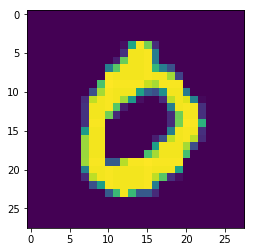

0


In [4]:
n = 3
import matplotlib.pyplot as plt
import numpy as np
predict = model.predict(X_val)
plt.imshow(X_val[n])
plt.show()
print(np.argmax(predict[n]))

In [ ]:
import numpy as np
X_vals = np.array([0,1,2,3,4], dtype = float)
y_vals = np.array([-1,1,3,5,7], dtype = float)
#y=3x+2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
model = Sequential([Dense(units = 1, input_shape = [1])])
model.compile(optimizer = 'sgd', loss = 'mean_squared_error', metrics = ['accuracy'])
model.fit(X_vals,y_vals, epochs = 20)

In [31]:
print(model.predict([5]))

[[8.999857]]


In [3]:
#Another method of building a CNN
pool_size = (4,4)
kernal_size = (4,4)

x_in = tf.keras.layers.Input(shape=(256,256,3))

x = tf.keras.layers.Conv2D(filters=32, kernel_size=kernal_size, activation='relu')(x_in)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.MaxPool2D(pool_size=pool_size)(x)

x = tf.keras.layers.Conv2D(filters=64, kernel_size=kernal_size, activation='relu')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.MaxPool2D(pool_size=pool_size)(x)

x = tf.keras.layers.Conv2D(filters=128, kernel_size=kernal_size, activation='relu')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.MaxPool2D(pool_size=pool_size)(x)

x_flatten = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(32, activation='relu')(x_flatten)

x_out = tf.keras.layers.Dense(2, activation='softmax')(x)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 3072)              0         
_________________________________________________________________
dense (Dense)                (None, 16)                49168     
_________________________________________________________________
dense_1 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 49,457
Trainable params: 49,457
Non-trainable params: 0
_________________________________________________________________
